# ANN Modelling

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt

In [3]:
#loading all three files
file_1 = "1S-1X log.csv"
file_2 = "1S-2X log.csv"
file_3 = "1S-3X log.csv"
file_4 = "1S-4X log.csv"

In [4]:
#creating a dataframe
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)
df4 = pd.read_csv(file_4)

In [5]:
#merging the first three together
df = pd.concat([df1, df2, df3], ignore_index=True)
display(df)
df = df[(df >= 0).all(axis=1)]
display(df)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.25,17.0387,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.25
1,91.5924,-999.25,16.6233,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.25
2,91.7448,-999.25,16.0359,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.25
3,91.8972,-999.25,15.2310,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.25
4,92.0496,-999.25,14.9397,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...
61452,2751.7344,-999.25,-999.2500,1.2092,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1.5490,-999.25
61453,2751.8868,-999.25,-999.2500,1.2145,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1.5538,-999.25
61454,2752.0392,-999.25,-999.2500,1.2299,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1.5776,-999.25
61455,2752.1916,-999.25,-999.2500,1.2550,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1.6230,-999.25


,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
61308,2729.7888,12.2535,85.9298,1.8382,0.0931,2.2281,2.6699,0.5899,0.2765,2.5826,2.4425,82.8130
61309,2729.9412,12.2412,85.4963,1.8557,0.0938,2.2328,2.6854,0.5421,0.2630,2.5764,2.4363,82.7427
61310,2730.0936,12.2509,86.1886,1.8716,0.0944,2.2375,2.6957,0.4983,0.2356,2.5799,2.4108,82.6735
61311,2730.2460,12.2523,86.9371,1.8809,0.0947,2.2525,2.7060,0.4652,0.2232,2.5651,2.3184,82.6100


In [24]:
#creating an excel file out of df
#df.to_excel('merged.xlsx', index=False)

In [6]:
#selecting features
low_corr_features = ['ILD', 'LLD', 'LLS', 'MSFL', 'SFL', 'SP']
target = 'RHOB'

#sorting
X = df[low_corr_features]
y = df[target]

In [7]:
#splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The ANN code is a type of feedforward neural network. The backpropagation algorithm is performed automatically. It involves calculating the gradients of the model's parameters with respect to a loss function and adjusting the weights and biases of the network to minimize the loss. The 'MLPRegressor' model in scikit-learn utilizes backpropagation as part of its training algorithm. 

<p>The input layer receives each feature selection as a node on the input layer. </p><p>
The  code specifies two hidden layers with 100 neurons each</p><p>The output layer produces the predicted value for the target variable. It contains a single node</p>

In [9]:
#Train the ANN model
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42)

In [10]:
#make predictions
y_pred = model.predict(X_test_scaled)

In [11]:
#calculate the R_square value
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R squared score:", r2)
print("Root Mean Square Error:", rmse)

R squared score: 0.49263611691500575
Root Mean Square Error: 0.09002428556292608


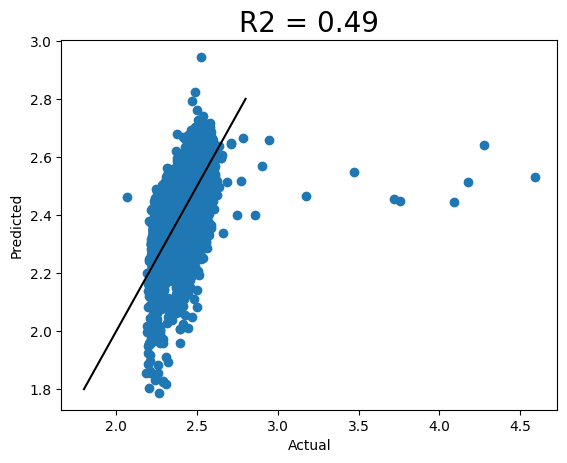

In [12]:
plt.scatter(y_pred, y_test)
plt.plot((1.8,2.8), (1.8,2.8), 'black')
plt.title('R2 = 0.49', fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Predicting in another well

In [13]:
#cleaning test file
df_test = df4.copy()
display(df_test)
df_test = df_test[(df_test >= -115).all(axis=1)]
display(df_test)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,97.8408,-999.2500,13.6945,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.25
1,97.9932,-999.2500,13.5321,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.25
2,98.1456,-999.2500,14.5434,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.25
3,98.2980,-999.2500,15.4332,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.25
4,98.4504,-999.2500,15.4140,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16644,2634.3864,10.7061,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-0.0366,2.5052,-999.25,-999.25
16645,2634.5388,10.7039,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-0.0370,2.5043,-999.25,-999.25
16646,2634.6912,10.6997,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-0.0371,2.5060,-999.25,-999.25
16647,2634.8436,10.6953,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,-0.0369,2.5068,-999.25,-999.25


,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
8530,1397.8128,13.0089,48.6938,4.8681,0.0394,1.3742,1.1744,0.3199,0.5072,1.8191,2.5852,-90.1580
8531,1397.9652,13.4357,50.5618,1.6163,0.0883,1.3631,1.1790,0.3188,0.5367,1.8125,1.3248,-97.6912
8532,1398.1176,17.8938,53.3130,2.0106,0.1045,1.3652,1.1826,0.3178,0.5531,1.8058,1.5789,-102.8984
8533,1398.2700,19.2379,55.1094,2.9638,0.1025,1.3925,1.1641,0.3188,0.5530,1.8008,7.9742,-110.9431
8534,1398.4224,20.3908,54.8873,3.5034,0.1027,1.3968,1.1310,0.3179,0.5423,1.7963,3.3761,-114.2520
...,...,...,...,...,...,...,...,...,...,...,...,...
12732,2038.1976,13.3214,47.5611,2.1493,0.0860,2.4922,2.5933,1.5312,0.2901,2.2778,2.3165,-37.2460
12733,2038.3500,13.3292,46.9579,2.1972,0.0865,2.1937,2.2315,1.5220,0.2863,2.2897,2.2338,-36.8327
12734,2038.5024,13.3443,45.3758,2.2765,0.0869,1.8790,1.9364,1.5135,0.2802,2.3038,2.1731,-36.7469
12735,2038.6548,13.3437,43.3764,2.3927,0.0872,1.9995,1.9078,1.5052,0.2691,2.3173,2.1331,-36.8805


In [14]:
#selecting feature from the new file
new_X = df_test[low_corr_features]
new_X

,ILD,LLD,LLS,MSFL,SFL,SP
8530,4.8681,1.3742,1.1744,0.3199,2.5852,-90.1580
8531,1.6163,1.3631,1.1790,0.3188,1.3248,-97.6912
8532,2.0106,1.3652,1.1826,0.3178,1.5789,-102.8984
8533,2.9638,1.3925,1.1641,0.3188,7.9742,-110.9431
8534,3.5034,1.3968,1.1310,0.3179,3.3761,-114.2520
...,...,...,...,...,...,...
12732,2.1493,2.4922,2.5933,1.5312,2.3165,-37.2460
12733,2.1972,2.1937,2.2315,1.5220,2.2338,-36.8327
12734,2.2765,1.8790,1.9364,1.5135,2.1731,-36.7469
12735,2.3927,1.9995,1.9078,1.5052,2.1331,-36.8805


In [15]:
#scaling new file
new_X_scaled = scaler.fit_transform(new_X)

In [16]:
#making predictions using the trained model
predictions = model.predict(new_X_scaled)

In [18]:
#calculating the R_square value
r2_new = r2_score(df_test['RHOB'], predictions)
mse_new = mean_squared_error(df_test['RHOB'], predictions)
rmse_new = np.sqrt(mse_new)
print("R squared score:", r2_new)
print("Root Mean Squared Error:", rmse_new)

R squared score: -0.7073061674918903
Root Mean Squared Error: 0.21091779862618165


<img src='r2_neg.png'>

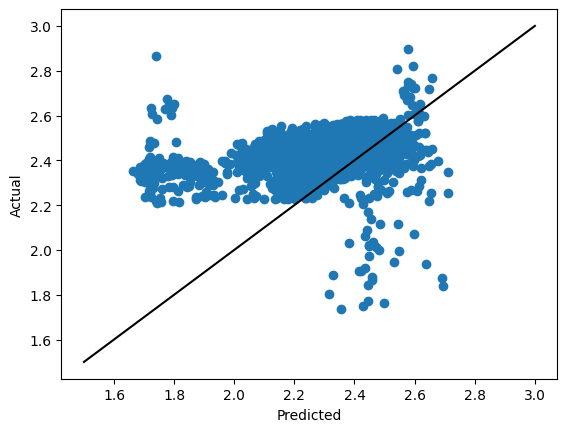

In [40]:
plt.scatter(df_test['RHOB'], predictions)
plt.plot((1.5,3), (1.5,3), 'black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# END OF CODE